In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

#@hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_883fcc5cd8954037a8949c3cb785b2c6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='dBxMM1_PdnifHGMrjuAd42BUzd-_tgoLodS5pZMHo-OT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_883fcc5cd8954037a8949c3cb785b2c6.get_object(Bucket='lifeexpectancy-donotdelete-pr-clqlzr9exlickh',Key='datasets_12603_17232_Life Expectancy Data (1).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()




Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Check out the Data

In [3]:
df_data_0.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [4]:
status = pd.get_dummies(df_data_0.Status)

In [5]:
df_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [6]:
df_data_0.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [7]:
df_data_0 = pd.concat([df_data_0, status], axis = 1)
df_data_0

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
5     Afghanistan  2010  Developing              58.8            279.0   
6     Afghanistan  2009  Developing              58.6            281.0   
7     Afghanistan  2008  Developing              58.1            287.0   
8     Afghanistan  2007  Developing              57.5            295.0   
9     Afghanistan  2006  Developing              57.3            295.0   
10    Afghanistan  2005  Developing              57.3            291.0   
11    Afghanistan  2004  Developing              57.0            293.0   
12    Afghanistan  2003  Developing              56.7            295.0   
13    Afghanistan  2002  Developing              56.2              3.0   
14    Afghanistan  2001  Developing              55.3            316.0   
15    Afghanistan  2000  Developing              54.8            321.0   
16        Albania  2015  Developing              77.8             74.0   
17        Albania  2014  Developing              77.5              8.0   
18        Albania  2013  Developing              77.2             84.0   
19        Albania  2012  Developing              76.9             86.0   
20        Albania  2011  Developing              76.6             88.0   
21        Albania  2010  Developing              76.2             91.0   
22        Albania  2009  Developing              76.1             91.0   
23        Albania  2008  Developing              75.3              1.0   
24        Albania  2007  Developing              75.9              9.0   
25        Albania  2006  Developing              74.2             99.0   
26        Albania  2005  Developing              73.5             15.0   
27        Albania  2004  Developing              73.0             17.0   
28        Albania  2003  Developing              72.8             18.0   
29        Albania  2002  Developing              73.3             15.0   
...           ...   ...         ...               ...              ...   
2908       Zambia  2013  Developing              63.0            328.0   
2909       Zambia  2012  Developing              59.2            349.0   
2910       Zambia  2011  Developing              58.2            366.0   
2911       Zambia  2010  Developing              58.0            363.0   
2912       Zambia  2009  Developing              57.4            368.0   
2913       Zambia  2008  Developing              55.7             45.0   
2914       Zambia  2007  Developing              52.6            487.0   
2915       Zambia  2006  Developing              58.0            526.0   
2916       Zambia  2005  Developing              49.3            554.0   
2917       Zambia  2004  Developing              47.9            578.0   
2918       Zambia  2003  Developing              46.4             64.0   
2919       Zambia  2002  Developing              45.5             69.0   
2920       Zambia  2001  Developing              44.6            611.0   
2921       Zambia  2000  Developing              43.8            614.0   
2922     Zimbabwe  2015  Developing              67.0            336.0   
2923     Zimbabwe  2014  Developing              59.2            371.0   
2924     Zimbabwe  2013  Developing              58.0            399.0   
2925     Zimbabwe  2012  Developing              56.6            429.0   
2926     Zimbabwe  2011  Developing              54.9            464.0   
2927     Zimbabwe  2010  Developing              52.4            527.0   
2928     Zimbabwe  2009  Developing              50.0            587.0   
2929     Zimbabwe  2008  Developing              48.2            632.0   
2930     Zimba

In [8]:
df_data_0 = df_data_0.drop(['Status'], axis=1)


In [9]:
df_data_0

Country  Year  Life expectancy   Adult Mortality  infant deaths  \
0     Afghanistan  2015              65.0            263.0             62   
1     Afghanistan  2014              59.9            271.0             64   
2     Afghanistan  2013              59.9            268.0             66   
3     Afghanistan  2012              59.5            272.0             69   
4     Afghanistan  2011              59.2            275.0             71   
5     Afghanistan  2010              58.8            279.0             74   
6     Afghanistan  2009              58.6            281.0             77   
7     Afghanistan  2008              58.1            287.0             80   
8     Afghanistan  2007              57.5            295.0             82   
9     Afghanistan  2006              57.3            295.0             84   
10    Afghanistan  2005              57.3            291.0             85   
11    Afghanistan  2004              57.0            293.0             87   
12    Afghanistan  2003              56.7            295.0             87   
13    Afghanistan  2002              56.2              3.0             88   
14    Afghanistan  2001              55.3            316.0             88   
15    Afghanistan  2000              54.8            321.0             88   
16        Albania  2015              77.8             74.0              0   
17        Albania  2014              77.5              8.0              0   
18        Albania  2013              77.2             84.0              0   
19        Albania  2012              76.9             86.0              0   
20        Albania  2011              76.6             88.0              0   
21        Albania  2010              76.2             91.0              1   
22        Albania  2009              76.1             91.0              1   
23        Albania  2008              75.3              1.0              1   
24        Albania  2007              75.9              9.0              1   
25        Albania  2006              74.2             99.0              1   
26        Albania  2005              73.5             15.0              1   
27        Albania  2004              73.0             17.0              1   
28        Albania  2003              72.8             18.0              1   
29        Albania  2002              73.3             15.0              1   
...           ...   ...               ...              ...            ...   
2908       Zambia  2013              63.0            328.0             29   
2909       Zambia  2012              59.2            349.0             29   
2910       Zambia  2011              58.2            366.0             29   
2911       Zambia  2010              58.0            363.0             30   
2912       Zambia  2009              57.4            368.0             30   
2913       Zambia  2008              55.7             45.0             31   
2914       Zambia  2007              52.6            487.0             32   
2915       Zambia  2006              58.0            526.0             33   
2916       Zambia  2005              49.3            554.0             34   
2917       Zambia  2004              47.9            578.0             36   
2918       Zambia  2003              46.4             64.0             39   
2919       Zambia  2002              45.5             69.0             41   
2920       Zambia  2001              44.6            611.0             43   
2921       Zambia  2000              43.8            614.0             44   
2922     Zimbabwe  2015              67.0            336.0             22   
2923     Zimbabwe  2014              59.2            371.0             23   
2924     Zimbabwe  2013              58.0            399.0             25   
2925     Zimbabwe  2012              56.6            429.0             26   
2926     Zimbabwe  2011              54.9            464.0             28   
2927     Zimbabwe  2010              52.4            527.0             29   
2928  

In [10]:
df_data_0.iloc[32]  

Country                                Algeria
Year                                      2015
Life expectancy                           75.6
Adult Mortality                             19
infant deaths                               21
Alcohol                                    NaN
percentage expenditure                       0
Hepatitis B                                 95
Measles                                     63
 BMI                                      59.5
under-five deaths                           24
Polio                                       95
Total expenditure                          NaN
Diphtheria                                  95
 HIV/AIDS                                  0.1
GDP                                    4132.76
Population                         3.98715e+07
 thinness  1-19 years                        6
 thinness 5-9 years                        5.8
Income composition of resources          0.743
Schooling                                 14.4
Developed    

In [11]:
df_data_0.iloc[33]  

Country                                Algeria
Year                                      2014
Life expectancy                           75.4
Adult Mortality                             11
infant deaths                               21
Alcohol                                   0.01
percentage expenditure                 54.2373
Hepatitis B                                 95
Measles                                      0
 BMI                                      58.4
under-five deaths                           24
Polio                                       95
Total expenditure                         7.21
Diphtheria                                  95
 HIV/AIDS                                  0.1
GDP                                    547.852
Population                         3.91133e+07
 thinness  1-19 years                        6
 thinness 5-9 years                        5.8
Income composition of resources          0.741
Schooling                                 14.4
Developed    

In [12]:
life_data = df_data_0.groupby('Country').mean()

In [13]:
life_data.head()

Year  Life expectancy   Adult Mortality  infant deaths  \
Country                                                                         
Afghanistan          2007.5          58.19375         269.0625        78.2500   
Albania              2007.5          75.15625          45.0625         0.6875   
Algeria              2007.5          73.61875         108.1875        20.3125   
Angola               2007.5          49.01875         328.5625        83.7500   
Antigua and Barbuda  2007.5          75.05625         127.5000         0.0000   

                      Alcohol  percentage expenditure  Hepatitis B   Measles   \
Country                                                                         
Afghanistan          0.014375               34.960110    64.562500  2362.2500   
Albania              4.848750              193.259091    98.000000    53.3750   
Algeria              0.406667              236.185241    78.000000  1943.8750   
Angola               5.740667              102.100268    70.222222  3561.3125   
Antigua and Barbuda  7.949333             1001.585226    98.266667     0.0000   

                         BMI   under-five deaths   ...  Diphtheria   \
Country                                            ...                
Afghanistan          15.51875            107.5625  ...      52.3125   
Albania              49.06875              0.9375  ...      98.0625   
Algeria              48.74375             23.5000  ...      91.8750   
Angola               18.01875            132.6250  ...      47.6875   
Antigua and Barbuda  38.42500              0.0000  ...      98.3125   

                      HIV/AIDS          GDP    Population  \
Country                                                     
Afghanistan            0.10000   340.015425  9.972260e+06   
Albania                0.10000  2119.726679  6.969116e+05   
Algeria                0.10000  2847.853392  2.164983e+07   
Angola                 2.36875  1975.143045  1.014710e+07   
Antigua and Barbuda    0.12500  9759.305728           NaN   

                      thinness  1-19 years   thinness 5-9 years  \
Country                                                           
Afghanistan                       16.58125             15.58125   
Albania                            1.61875              1.70000   
Algeria                            6.09375              5.97500   
Angola                             6.19375              6.66875   
Antigua and Barbuda                3.42500              3.37500   

                     Income composition of resources  Schooling  Developed  \
Country                                                                      
Afghanistan                                 0.415375    8.21250          0   
Albania                                     0.709875   12.13750          0   
Algeria                                     0.694875   12.71250          0   
Angola                                      0.458375    8.04375          0   
Antigua and Barbuda                         0.488625    8.84375          0   

                     Developing  
Country                          
Afghanistan                   1  
Albania                       1  
Algeria                       1  
Angola                        1  
Antigua and Barbuda           1  

[5 rows x 22 columns]

In [14]:
life_data.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

Text(0, 0.5, 'Life expectancy')

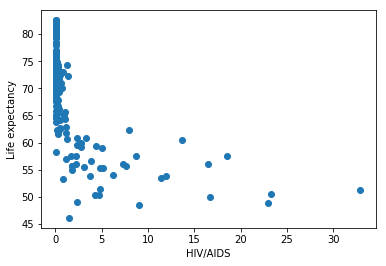

In [15]:
plt.scatter(life_data[' HIV/AIDS'], life_data['Life expectancy '])
plt.xlabel('HIV/AIDS')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

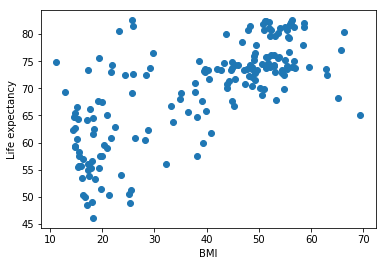

In [16]:
plt.scatter(life_data[' BMI '], life_data['Life expectancy '])
plt.xlabel('BMI')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

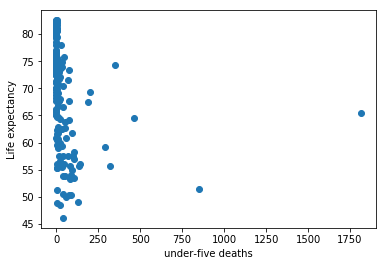

In [17]:
plt.scatter(life_data['under-five deaths '], life_data['Life expectancy '])
plt.xlabel('under-five deaths')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

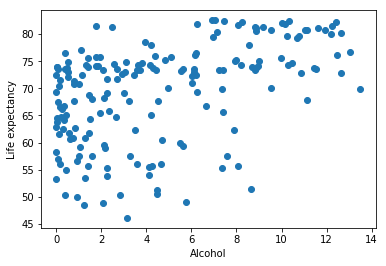

In [18]:
plt.scatter(life_data['Alcohol'], life_data['Life expectancy '])
plt.xlabel('Alcohol')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

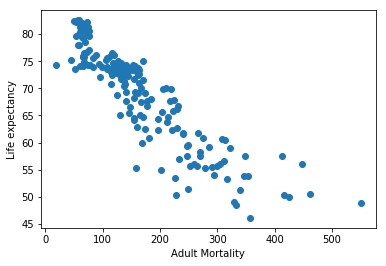

In [19]:
plt.scatter(life_data['Adult Mortality'], life_data['Life expectancy '])
plt.xlabel('Adult Mortality')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

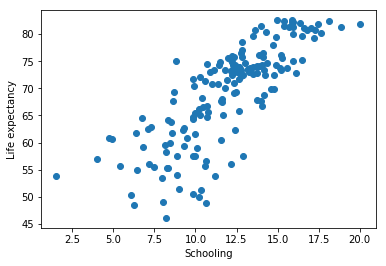

In [20]:
plt.scatter(life_data['Schooling'], life_data['Life expectancy '])
plt.xlabel('Schooling')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

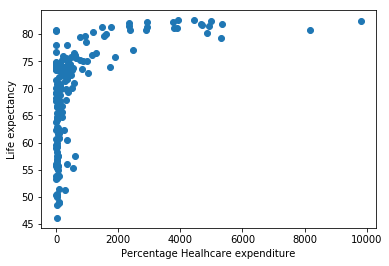

In [21]:
plt.scatter(life_data['percentage expenditure'], life_data['Life expectancy '])
plt.xlabel('Percentage Healhcare expenditure')
plt.ylabel('Life expectancy')

In [22]:
df_data_0.iloc[32]

Country                                Algeria
Year                                      2015
Life expectancy                           75.6
Adult Mortality                             19
infant deaths                               21
Alcohol                                    NaN
percentage expenditure                       0
Hepatitis B                                 95
Measles                                     63
 BMI                                      59.5
under-five deaths                           24
Polio                                       95
Total expenditure                          NaN
Diphtheria                                  95
 HIV/AIDS                                  0.1
GDP                                    4132.76
Population                         3.98715e+07
 thinness  1-19 years                        6
 thinness 5-9 years                        5.8
Income composition of resources          0.743
Schooling                                 14.4
Developed    

In [23]:
df_data_0.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths   ...  Diphtheria      HIV/AIDS  \
count  2904.000000         2938.000000  ...  2919.000000  2938.000000   
mean     38.321247           42.035739  ...    82.324084     1.742103   
std      20.044034          160.445548  ...    23.716912     5.077785   
min       1.000000            0.000000  ...     2.000000     0.100000   
25%      19.300000            0.000000  ...    78.000000     0.100000   
50%      43.500000            4.000000  ...    93.000000     0.100000   
75%      56.200000           28.000000  ...    97.000000     0.800000   
max      87.300000         2500.000000  ...    99.000000    50.600000   

                 GDP    Population   thinness  1-19 years  \
count    2490.000000  2.286000e+03            2904.000000   
mean     7483.158469  1.275338e+07               4.839704   
std     14270.169342  6.101210e+07               4.420195   
min         1.681350  3.400000e+01               0.100000   
25%       463.935626  1.957932e+05               1.600000   
50%      1766.947595  1.386542e+06               3.300000   
75%      5910.806335  7.420359e+06               7.200000   
max    119172.741800  1.293859e+09              27.700000   

        thinness 5-9 years  Income composition of resources    Schooling  \
count          2904.000000                      2771.000000  2775.000000   
mean              4.870317                         0.627551    11.992793   
std               4.508882                         0.210904     3.358920   
min               0.100000                         0.000000     0.000000   
25%               1.500000                         0.493000    10.100000   
50%               3.300000                         0.677000    12.300000   
75%               7.200000                         0.779000    14.300000   
max              28.600000                         0.948000    20.700000   

         Developed   Developing  
count  2938.000000  2938.000000  
mean      0.174268     0.825732  
std       0.379405     0.379405  
min       0.000000     0.000000  
25%       0.000000     1.000000  
50%       0.000000     1.000000  
75%       0.000000     1.000000  
max       1.000000     1.000000  

[8 rows x 22 columns]

In [24]:
country_list=df_data_0.Country.unique()
print(len(country_list))
country_list

193


array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [25]:
df_data_0.columns


Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Developed',
       'Developing'],
      dtype='object')

In [26]:
for countr in country_list:
    df_data_0.loc[df_data_0['Country']==countr,df_data_0.columns]=df_data_0.loc[df_data_0['Country']==countr,df_data_0.columns].interpolate()
df_data_0.dropna(inplace=True)

In [27]:
df_data_0

Country  Year  Life expectancy   Adult Mortality  infant deaths  \
0     Afghanistan  2015              65.0            263.0             62   
1     Afghanistan  2014              59.9            271.0             64   
2     Afghanistan  2013              59.9            268.0             66   
3     Afghanistan  2012              59.5            272.0             69   
4     Afghanistan  2011              59.2            275.0             71   
5     Afghanistan  2010              58.8            279.0             74   
6     Afghanistan  2009              58.6            281.0             77   
7     Afghanistan  2008              58.1            287.0             80   
8     Afghanistan  2007              57.5            295.0             82   
9     Afghanistan  2006              57.3            295.0             84   
10    Afghanistan  2005              57.3            291.0             85   
11    Afghanistan  2004              57.0            293.0             87   
12    Afghanistan  2003              56.7            295.0             87   
13    Afghanistan  2002              56.2              3.0             88   
14    Afghanistan  2001              55.3            316.0             88   
15    Afghanistan  2000              54.8            321.0             88   
16        Albania  2015              77.8             74.0              0   
17        Albania  2014              77.5              8.0              0   
18        Albania  2013              77.2             84.0              0   
19        Albania  2012              76.9             86.0              0   
20        Albania  2011              76.6             88.0              0   
21        Albania  2010              76.2             91.0              1   
22        Albania  2009              76.1             91.0              1   
23        Albania  2008              75.3              1.0              1   
24        Albania  2007              75.9              9.0              1   
25        Albania  2006              74.2             99.0              1   
26        Albania  2005              73.5             15.0              1   
27        Albania  2004              73.0             17.0              1   
28        Albania  2003              72.8             18.0              1   
29        Albania  2002              73.3             15.0              1   
...           ...   ...               ...              ...            ...   
2907       Zambia  2014              61.1            314.0             28   
2908       Zambia  2013              63.0            328.0             29   
2909       Zambia  2012              59.2            349.0             29   
2910       Zambia  2011              58.2            366.0             29   
2911       Zambia  2010              58.0            363.0             30   
2912       Zambia  2009              57.4            368.0             30   
2913       Zambia  2008              55.7             45.0             31   
2914       Zambia  2007              52.6            487.0             32   
2915       Zambia  2006              58.0            526.0             33   
2916       Zambia  2005              49.3            554.0             34   
2917       Zambia  2004              47.9            578.0             36   
2918       Zambia  2003              46.4             64.0             39   
2919       Zambia  2002              45.5             69.0             41   
2920       Zambia  2001              44.6            611.0             43   
2921       Zambia  2000              43.8            614.0             44   
2923     Zimbabwe  2014              59.2            371.0             23   
2924     Zimbabwe  2013              58.0            399.0             25   
2925     Zimbabwe  2012              56.6            429.0             26   
2926     Zimbabwe  2011              54.9            464.0             28   
2927     Zimbabwe  2010              52.4            527.0             29   
2928  

In [28]:
df_data_0.isnull().values.any()

False

In [29]:
df_data_0.shape

(1987, 23)

In [30]:
df_data_0.columns

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Developed',
       'Developing'],
      dtype='object')

# EDA

Let's create some simple plots to check out the data!

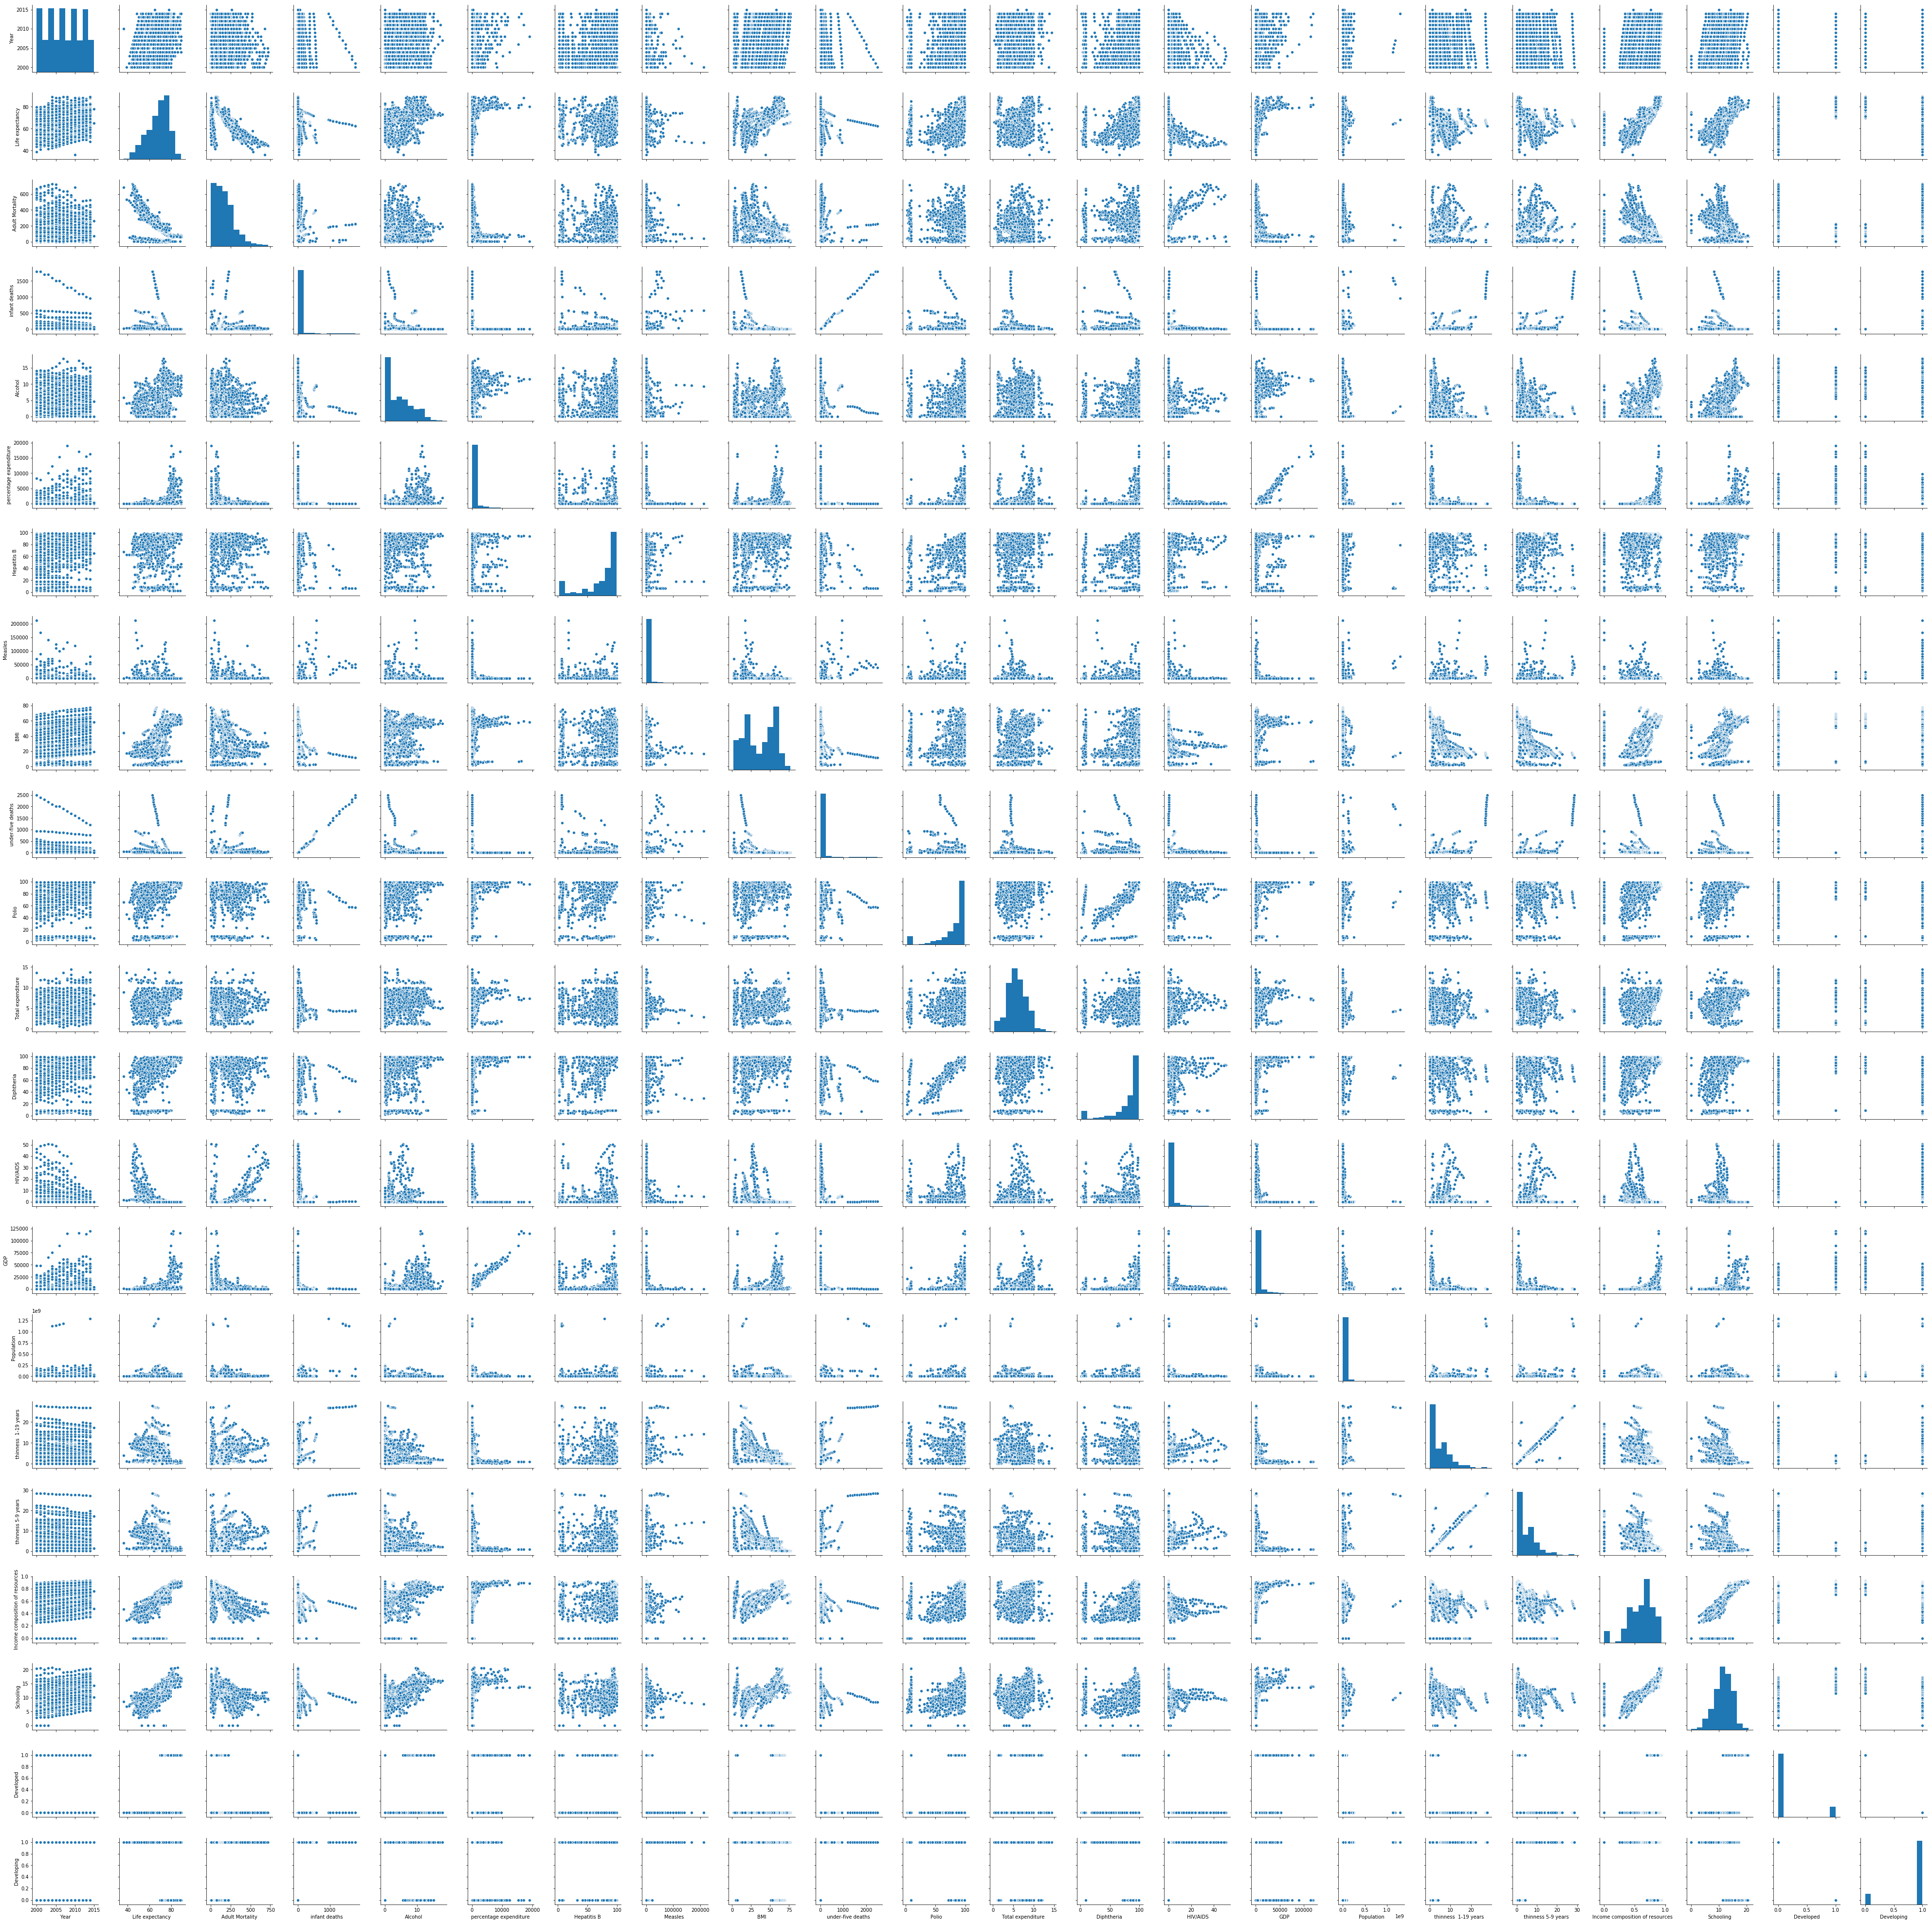

In [31]:
sns.pairplot(df_data_0)

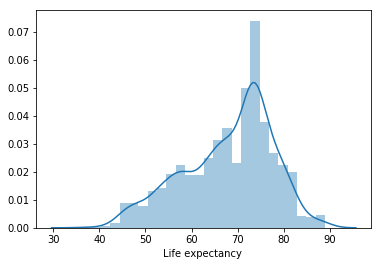

In [32]:
sns.distplot(df_data_0['Life expectancy '])

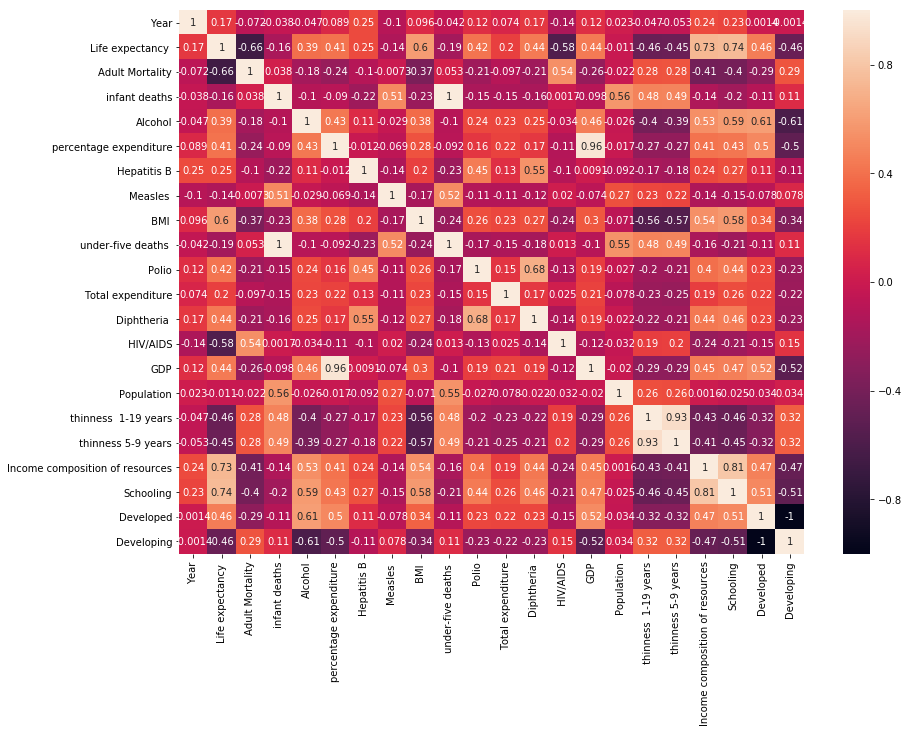

In [33]:
plt.figure(figsize = (14, 10))
sns.heatmap(df_data_0.corr(),annot = True)

we observe that the year is almost 0 in all cases hence we drop year

In [34]:
life_data = life_data.drop('Year', axis = 1)

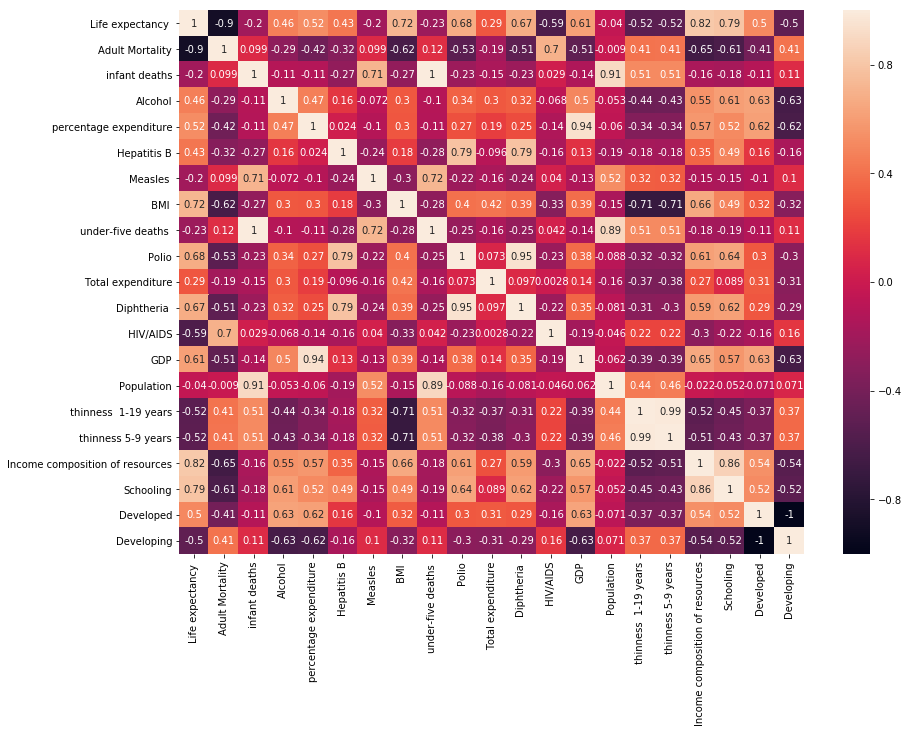

In [35]:
plt.figure(figsize = (14, 10))
sns.heatmap(life_data.corr(), annot = True)

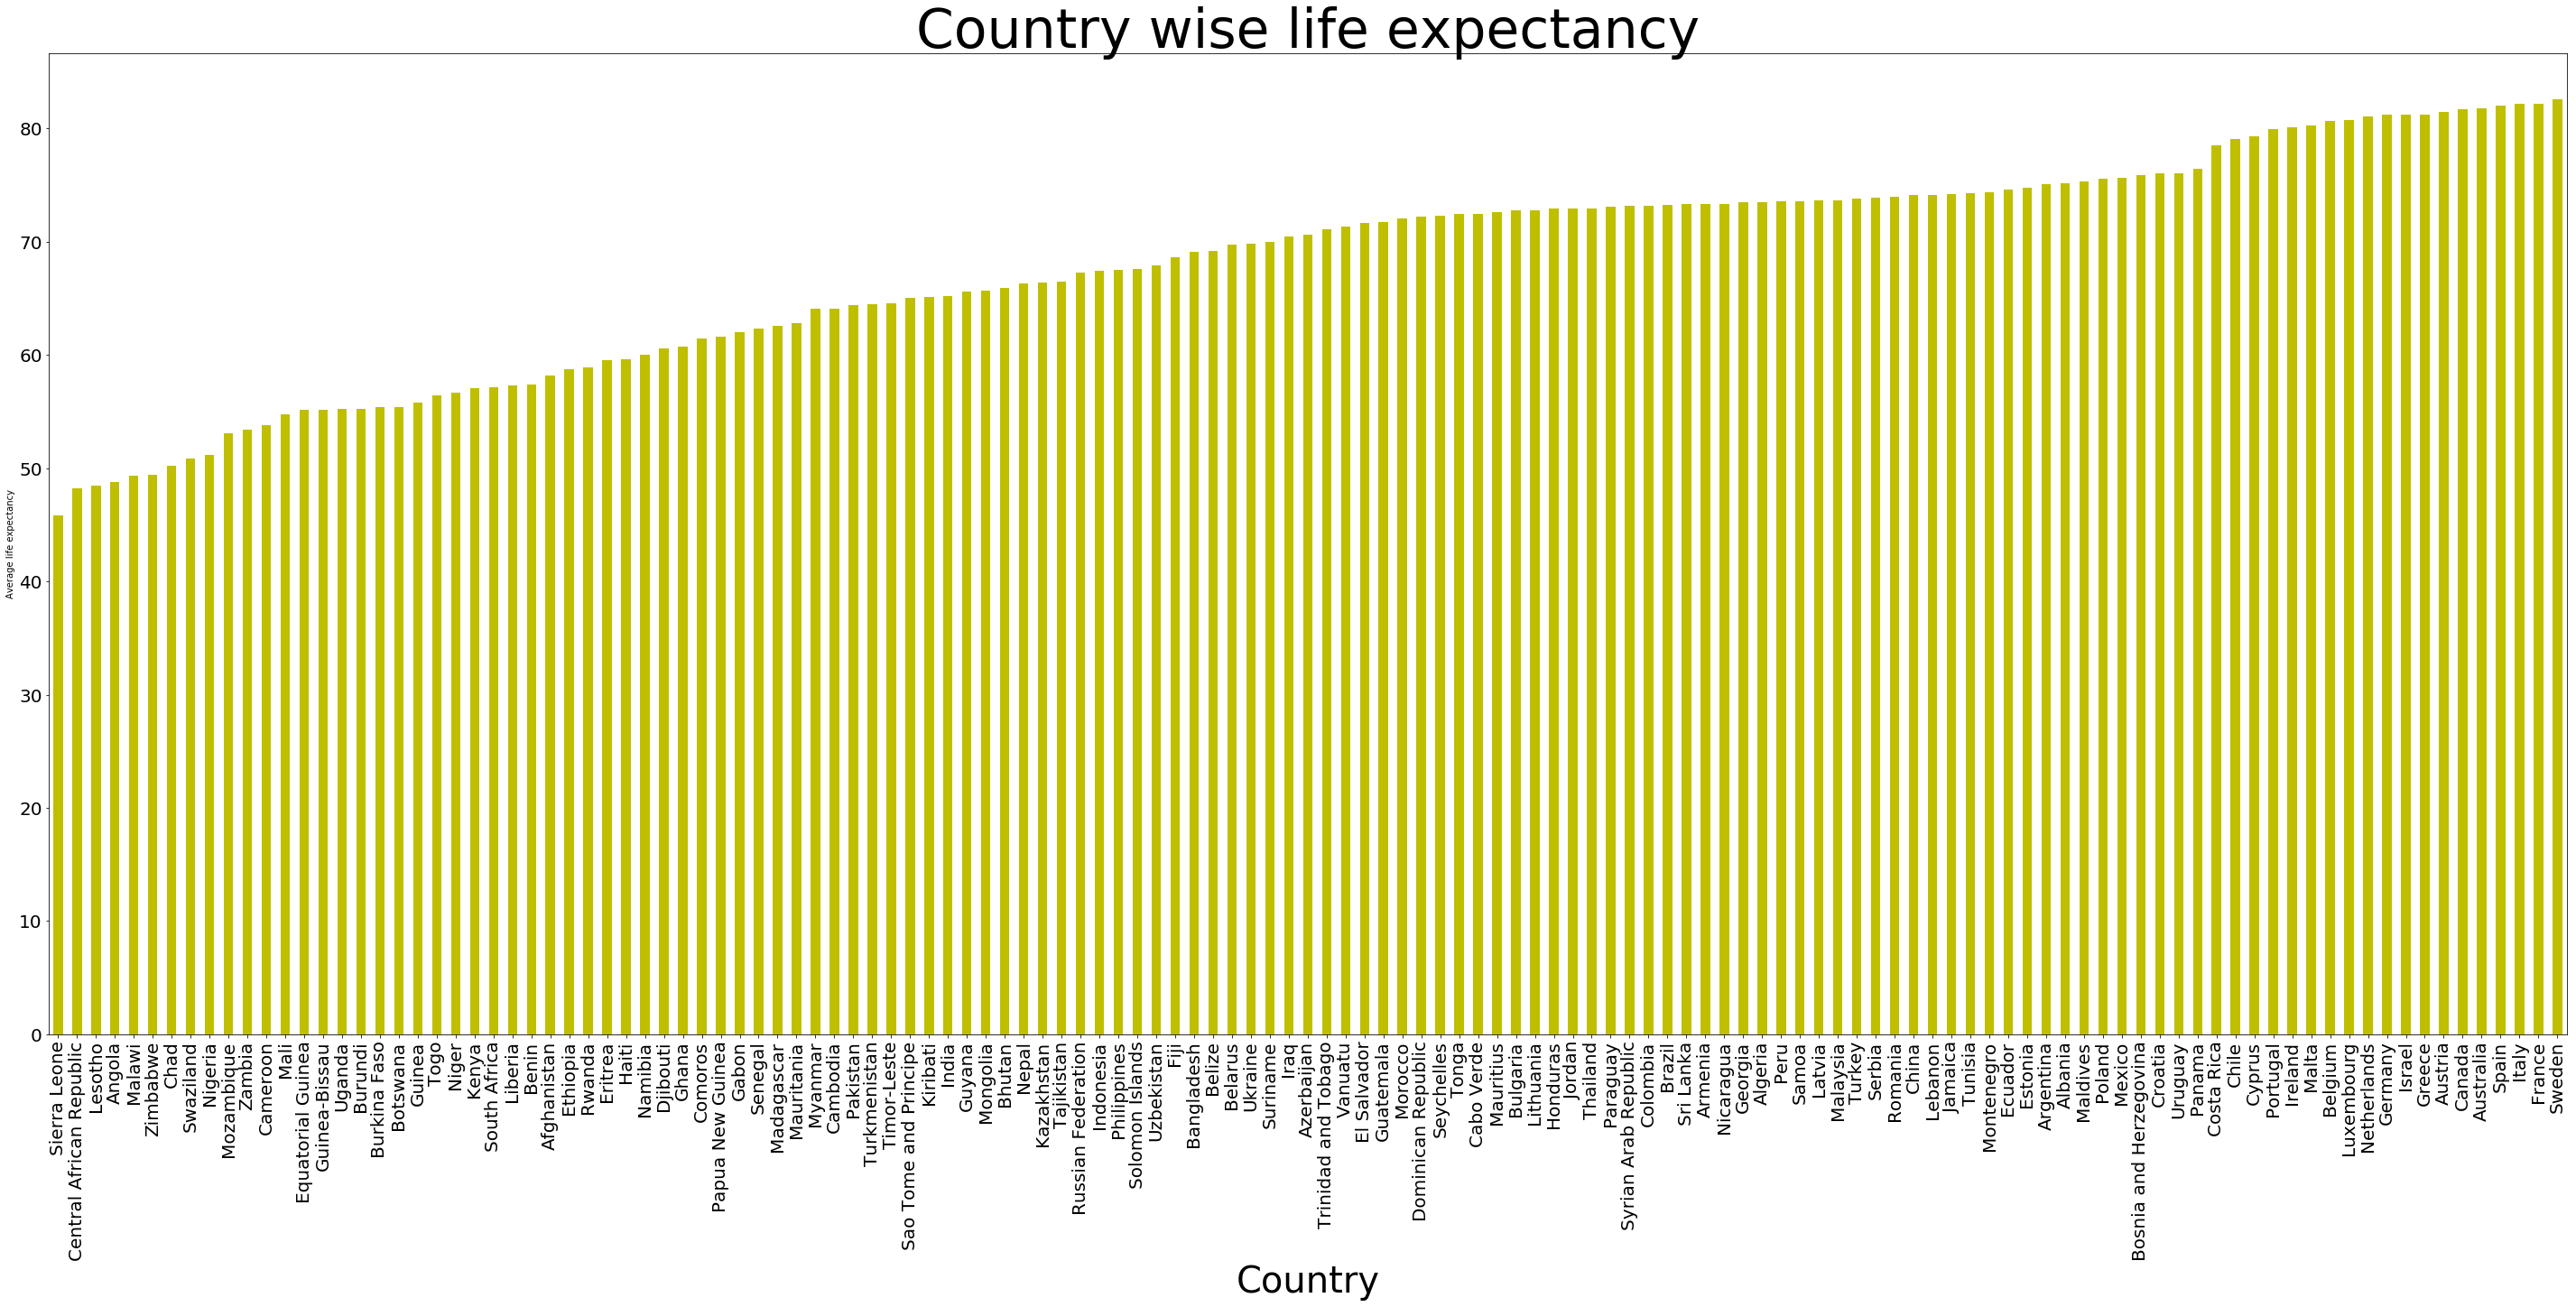

In [36]:
Country_d=df_data_0.groupby('Country')['Life expectancy '].mean().sort_values(ascending=True)
Country_d.plot(kind='bar',figsize=(50,20),fontsize=20,color='y')
plt.title("Country wise life expectancy",fontsize=60)
plt.xlabel('Country',fontsize=40)
plt.ylabel('Average life expectancy')
plt.show()

In [37]:
import pandas as pd
X = df_data_0[[ 'Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Developed',
       'Developing']]
y = pd.DataFrame(data=df_data_0,columns=['Life expectancy '])

In [38]:
X.head()

Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0  2015            263.0             62     0.01               71.279624   
1  2014            271.0             64     0.01               73.523582   
2  2013            268.0             66     0.01               73.219243   
3  2012            272.0             69     0.01               78.184215   
4  2011            275.0             71     0.01                7.097109   

   Hepatitis B  Measles    BMI   under-five deaths   Polio  ...  Diphtheria   \
0         65.0      1154   19.1                  83    6.0  ...         65.0   
1         62.0       492   18.6                  86   58.0  ...         62.0   
2         64.0       430   18.1                  89   62.0  ...         64.0   
3         67.0      2787   17.6                  93   67.0  ...         67.0   
4         68.0      3013   17.2                  97   68.0  ...         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  Developed  \
0                 17.3                            0.479       10.1          0   
1                 17.5                            0.476       10.0          0   
2                 17.7                            0.470        9.9          0   
3                 18.0                            0.463        9.8          0   
4                 18.2                            0.454        9.5          0   

   Developing  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 21 columns]

In [39]:
y.head()

Life expectancy 
0              65.0
1              59.9
2              59.9
3              59.5
4              59.2

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = [
   LinearRegression(),
    ExtraTreesRegressor(),
    Ridge(),
    DecisionTreeRegressor(),
    Lasso(),
    RandomForestRegressor(),
    ElasticNet()
    ]
for modeler in models:
    model = modeler.fit(X_train, y_train)
    score=r2_score(model.predict(X_test),y_test)
    print(modeler)
    print("model score: %.3f" % score)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
model score: 0.805
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)
model score: 0.958
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
model score: 0.805
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
model score: 0.914
Lasso(alpha=

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.52064e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
model score: 0.940
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
model score: 0.781


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Training a Regression Model by preprocessing it and including both numeric and non numeric values

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Life expectancy column. 

### X and y arrays

In [41]:
import pandas as pd
X = df_data_0[[ 'Country','Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Developed',
       'Developing']]
y = pd.DataFrame(data=df_data_0,columns=['Life expectancy '])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
num_feat=['Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Developed',
       'Developing']
cat_feat=['Country']
categorical_transformer=Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore'))])

numeric_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='median'))])


In [42]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('cat',categorical_transformer,cat_feat),('num',numeric_transformer,num_feat)])

In [43]:
from collections import OrderedDict
modeling=OrderedDict([("Linear Regression",Pipeline([('preprocessor',preprocessor),('RFRegressor',LinearRegression())])),
                      ("Extra Trees Regression",Pipeline([('preprocessor',preprocessor),('RFRegressor',ExtraTreesRegressor())])),
                      ("Ridge Regression",Pipeline([('preprocessor',preprocessor),('RFRegressor', Ridge())])),
                      ("Decision Tree Regression",Pipeline([('preprocessor',preprocessor),('RFRegressor',DecisionTreeRegressor())])),
                      ("Lasso Regression",Pipeline([('preprocessor',preprocessor),('RFRegressor',Lasso())])),
                      ("Random Forest Regression",Pipeline([('preprocessor',preprocessor),('RFRegressor',RandomForestRegressor())])),
                      ("ElasticNet Regression",Pipeline([('preprocessor',preprocessor),('RFRegressor',ElasticNet())]))
    
                 
                 
                 
                 ])

In [44]:
for (name,modelers) in modeling.items():
    modelers.fit(X_train, y_train)
    scoree=r2_score(modelers.predict(X_test),y_test)
    print(name)
    print("model score: %.3f" % scoree)

Linear Regression
model score: 0.711


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Extra Trees Regression
model score: 0.963


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Ridge Regression
model score: -17997.668
Decision Tree Regression
model score: 0.918


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Lasso Regression
model score: 0.780
Random Forest Regression
model score: 0.945
ElasticNet Regression
model score: 0.781


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Extra Trees Regression yields the highest score so we use to deploy it

In [45]:
RFRegrrosor=Pipeline([('preprocessor',preprocessor),('RFRegressor',ExtraTreesRegressor())])

In [46]:
RFRegrrosor.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('cat', Pipeline(memory=None,
     steps=[('onehot', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>...mators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False))])

## Predictions from our Model
Let's grab predictions off our test set and see how well it did!

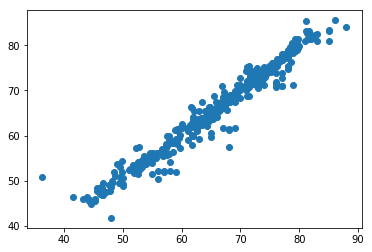

In [47]:
predictions2=RFRegrrosor.predict(X_test)
plt.scatter(y_test,predictions2)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [48]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions2))
print('MSE:', metrics.mean_squared_error(y_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

MAE: 0.9789782244556117
MSE: 3.0962514237855965
RMSE: 1.7596168400494456


In [49]:
life_labels = life_data['Life expectancy ']
life_features = life_data.drop('Life expectancy ', axis = 1)

In [50]:
life_features.isnull().head()

Adult Mortality  infant deaths  Alcohol  \
Country                                                        
Afghanistan                    False          False    False   
Albania                        False          False    False   
Algeria                        False          False    False   
Angola                         False          False    False   
Antigua and Barbuda            False          False    False   

                     percentage expenditure  Hepatitis B  Measles    BMI   \
Country                                                                     
Afghanistan                           False        False     False  False   
Albania                               False        False     False  False   
Algeria                               False        False     False  False   
Angola                                False        False     False  False   
Antigua and Barbuda                   False        False     False  False   

                     under-five deaths   Polio  Total expenditure  \
Country                                                             
Afghanistan                       False  False              False   
Albania                           False  False              False   
Algeria                           False  False              False   
Angola                            False  False              False   
Antigua and Barbuda               False  False              False   

                     Diphtheria    HIV/AIDS    GDP  Population  \
Country                                                          
Afghanistan                False      False  False       False   
Albania                    False      False  False       False   
Algeria                    False      False  False       False   
Angola                     False      False  False       False   
Antigua and Barbuda        False      False  False        True   

                      thinness  1-19 years   thinness 5-9 years  \
Country                                                           
Afghanistan                          False                False   
Albania                              False                False   
Algeria                              False                False   
Angola                               False                False   
Antigua and Barbuda                  False                False   

                     Income composition of resources  Schooling  Developed  \
Country                                                                      
Afghanistan                                    False      False      False   
Albania                                        False      False      False   
Algeria                                        False      False      False   
Angola                                         False      False      False   
Antigua and Barbuda                            False      False      False   

                     Developing  
Country                          
Afghanistan               False  
Albania                   False  
Algeria                   False  
Angola                    False  
Antigua and Barbuda       False

In [51]:
life_features.isnull().sum()

Adult Mortality                    10
infant deaths                       0
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                30
Population                         48
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    17
Schooling                          13
Developed                           0
Developing                          0
dtype: int64

In [52]:
life_labels.isnull().sum()

10

In [53]:
life_features.fillna(value = life_features.mean(), inplace = True)

In [54]:
life_labels.isnull().sum()

10

In [55]:
life_features

Adult Mortality  \
Country                                                               
Afghanistan                                              269.062500   
Albania                                                   45.062500   
Algeria                                                  108.187500   
Angola                                                   328.562500   
Antigua and Barbuda                                      127.500000   
Argentina                                                106.000000   
Armenia                                                  117.375000   
Australia                                                 63.187500   
Austria                                                   65.750000   
Azerbaijan                                               115.187500   
Bahamas                                                  152.062500   
Bahrain                                                   65.375000   
Bangladesh                                               141.375000   
Barbados                                                  77.625000   
Belarus                                                  218.750000   
Belgium                                                   70.187500   
Belize                                                   155.500000   
Benin                                                    269.375000   
Bhutan                                                   230.250000   
Bolivia (Plurinational State of)                         177.500000   
Bosnia and Herzegovina                                    64.937500   
Botswana                                                 448.125000   
Brazil                                                   150.687500   
Brunei Darussalam                                         67.062500   
Bulgaria                                                 125.500000   
Burkina Faso                                             252.500000   
Burundi                                                  291.562500   
Cabo Verde                                               116.187500   
Cambodia                                                 196.375000   
Cameroon                                                 294.875000   
...                                                             ...   
Suriname                                                 166.000000   
Swaziland                                                339.000000   
Sweden                                                    59.187500   
Switzerland                                               55.750000   
Syrian Arab Republic                                     139.625000   
Tajikistan                                               177.562500   
Thailand                                                 160.375000   
The former Yugoslav republic of Macedonia                 60.812500   
Timor-Leste                                              170.375000   
Togo                                                     311.312500   
Tonga                                                    129.625000   
Trinidad and Tobago                                      163.375000   
Tunisia                                                   18.750000   
Turkey                                                    98.375000   
Turkmenistan                                             214.812500   
Tuvalu                                                   164.796448   
Uganda                                                   300.187500   
Ukraine                                                  205.750000   
United Arab Emirates                                      67.062500   
United Kingdom of Great Britain and Northern Ir...        70.375000   
United Republic of Tanzania                              304.437500   
United States of America                                  58.187500   
Uruguay                                                  119.937500   
Uzbekistan                                               184.812500   
Vanua

In [56]:
life_features.isnull().head()

Adult Mortality  infant deaths  Alcohol  \
Country                                                        
Afghanistan                    False          False    False   
Albania                        False          False    False   
Algeria                        False          False    False   
Angola                         False          False    False   
Antigua and Barbuda            False          False    False   

                     percentage expenditure  Hepatitis B  Measles    BMI   \
Country                                                                     
Afghanistan                           False        False     False  False   
Albania                               False        False     False  False   
Algeria                               False        False     False  False   
Angola                                False        False     False  False   
Antigua and Barbuda                   False        False     False  False   

                     under-five deaths   Polio  Total expenditure  \
Country                                                             
Afghanistan                       False  False              False   
Albania                           False  False              False   
Algeria                           False  False              False   
Angola                            False  False              False   
Antigua and Barbuda               False  False              False   

                     Diphtheria    HIV/AIDS    GDP  Population  \
Country                                                          
Afghanistan                False      False  False       False   
Albania                    False      False  False       False   
Algeria                    False      False  False       False   
Angola                     False      False  False       False   
Antigua and Barbuda        False      False  False       False   

                      thinness  1-19 years   thinness 5-9 years  \
Country                                                           
Afghanistan                          False                False   
Albania                              False                False   
Algeria                              False                False   
Angola                               False                False   
Antigua and Barbuda                  False                False   

                     Income composition of resources  Schooling  Developed  \
Country                                                                      
Afghanistan                                    False      False      False   
Albania                                        False      False      False   
Algeria                                        False      False      False   
Angola                                         False      False      False   
Antigua and Barbuda                            False      False      False   

                     Developing  
Country                          
Afghanistan               False  
Albania                   False  
Algeria                   False  
Angola                    False  
Antigua and Barbuda       False

In [57]:
life_labels.fillna(value = life_labels.mean(), inplace = True)

In [58]:
life_features.head()

Adult Mortality  infant deaths   Alcohol  \
Country                                                         
Afghanistan                 269.0625        78.2500  0.014375   
Albania                      45.0625         0.6875  4.848750   
Algeria                     108.1875        20.3125  0.406667   
Angola                      328.5625        83.7500  5.740667   
Antigua and Barbuda         127.5000         0.0000  7.949333   

                     percentage expenditure  Hepatitis B   Measles       BMI   \
Country                                                                         
Afghanistan                       34.960110    64.562500  2362.2500  15.51875   
Albania                          193.259091    98.000000    53.3750  49.06875   
Algeria                          236.185241    78.000000  1943.8750  48.74375   
Angola                           102.100268    70.222222  3561.3125  18.01875   
Antigua and Barbuda             1001.585226    98.266667     0.0000  38.42500   

                     under-five deaths     Polio  Total expenditure  \
Country                                                               
Afghanistan                    107.5625  48.3750           8.252500   
Albania                          0.9375  98.1250           5.945625   
Algeria                         23.5000  91.7500           4.604000   
Angola                         132.6250  46.1250           3.919333   
Antigua and Barbuda              0.0000  96.9375           4.791333   

                     Diphtheria    HIV/AIDS          GDP    Population  \
Country                                                                  
Afghanistan              52.3125    0.10000   340.015425  9.972260e+06   
Albania                  98.0625    0.10000  2119.726679  6.969116e+05   
Algeria                  91.8750    0.10000  2847.853392  2.164983e+07   
Angola                   47.6875    2.36875  1975.143045  1.014710e+07   
Antigua and Barbuda      98.3125    0.12500  9759.305728  1.257006e+07   

                      thinness  1-19 years   thinness 5-9 years  \
Country                                                           
Afghanistan                       16.58125             15.58125   
Albania                            1.61875              1.70000   
Algeria                            6.09375              5.97500   
Angola                             6.19375              6.66875   
Antigua and Barbuda                3.42500              3.37500   

                     Income composition of resources  Schooling  Developed  \
Country                                                                      
Afghanistan                                 0.415375    8.21250          0   
Albania                                     0.709875   12.13750          0   
Algeria                                     0.694875   12.71250          0   
Angola                                      0.458375    8.04375          0   
Antigua and Barbuda                         0.488625    8.84375          0   

                     Developing  
Country                          
Afghanistan                   1  
Albania                       1  
Algeria                       1  
Angola                        1  
Antigua and Barbuda           1

In [59]:
life_features.iloc[1] 

Adult Mortality                        45.062500
infant deaths                           0.687500
Alcohol                                 4.848750
percentage expenditure                193.259091
Hepatitis B                            98.000000
Measles                                53.375000
 BMI                                   49.068750
under-five deaths                       0.937500
Polio                                  98.125000
Total expenditure                       5.945625
Diphtheria                             98.062500
 HIV/AIDS                               0.100000
GDP                                  2119.726679
Population                         696911.625000
 thinness  1-19 years                   1.618750
 thinness 5-9 years                     1.700000
Income composition of resources         0.709875
Schooling                              12.137500
Developed                               0.000000
Developing                              1.000000
Name: Albania, dtype

In [60]:
life_labels.iloc[1] 

75.15624999999999

In [61]:
from scipy import stats
stats.describe(life_features[1:])

DescribeResult(nobs=192, minmax=(array([1.87500000e+01, 0.00000000e+00, 1.00000000e-02, 0.00000000e+00,
       8.00000000e+00, 0.00000000e+00, 5.20000000e+00, 0.00000000e+00,
       9.00000000e+00, 1.64666667e+00, 9.00000000e+00, 1.00000000e-01,
       1.36183210e+02, 2.92000000e+02, 1.00000000e-01, 1.00000000e-01,
       1.31687500e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), array([5.50062500e+02, 1.36668750e+03, 1.34973333e+01, 9.80181038e+03,
       9.90000000e+01, 6.58579375e+04, 8.73000000e+01, 1.81250000e+03,
       9.90000000e+01, 1.72400000e+01, 9.90000000e+01, 3.29437500e+01,
       5.73628746e+04, 4.21467691e+08, 2.71000000e+01, 2.79437500e+01,
       9.31437500e-01, 2.00375000e+01, 1.00000000e+00, 1.00000000e+00])), mean=array([1.64253396e+02, 2.85745443e+01, 4.46296480e+00, 7.12321318e+02,
       7.85909681e+01, 2.30174674e+03, 3.96797168e+01, 3.96419271e+01,
       8.26078218e+01, 6.01668050e+00, 8.23842541e+01, 1.67047526e+00,
       7.25930328e+03, 1.25835883e

In [62]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [63]:
life_features = min_max_scaler.fit_transform(life_features)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [64]:
life_features

array([[4.71121045e-01, 5.72552248e-02, 3.24378429e-04, ...,
        4.09856519e-01, 0.00000000e+00, 1.00000000e+00],
       [4.95235855e-02, 5.03041112e-04, 3.58762543e-01, ...,
        6.05739239e-01, 0.00000000e+00, 1.00000000e+00],
       [1.68333137e-01, 1.48625783e-02, 2.94103109e-02, ...,
        6.34435434e-01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.63369015e-01, 2.88105364e-02, 2.76802926e-03, ...,
        4.24516532e-01, 0.00000000e+00, 1.00000000e+00],
       [6.31572756e-01, 2.44660905e-02, 1.65290890e-01, ...,
        5.59575795e-01, 0.00000000e+00, 1.00000000e+00],
       [8.34960593e-01, 1.94356793e-02, 3.31570362e-01, ...,
        4.90330630e-01, 0.00000000e+00, 1.00000000e+00]])

In [65]:
from sklearn.model_selection import train_test_split
life_features_train, life_features_test, life_labels_train, life_labels_test = train_test_split( life_features, life_labels, train_size = 0.7, test_size = 0.3)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nose.tools import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer
from scipy import stats
import seaborn as sns
linear_model = LinearRegression()
linear_model.fit(life_features_train, life_labels_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
print('R_square score on the training: %.2f' % linear_model.score(life_features_train, life_labels_train))

R_square score on the training: 0.93


In [67]:
linear_model_predict = linear_model.predict(life_features_test)


In [68]:
life_features_test

array([[4.64180685e-01, 1.71582750e-01, 1.04839108e-01, ...,
        5.93591876e-01, 0.00000000e+00, 1.00000000e+00],
       [2.27620280e-01, 1.60058536e-03, 0.00000000e+00, ...,
        7.38303182e-01, 0.00000000e+00, 1.00000000e+00],
       [2.65733443e-01, 5.71637627e-03, 2.47145470e-04, ...,
        3.65252651e-01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.12551465e-01, 1.60515846e-02, 1.18530967e-01, ...,
        5.81097941e-01, 0.00000000e+00, 1.00000000e+00],
       [2.22091519e-01, 2.28197741e-02, 9.24324057e-03, ...,
        4.94385527e-01, 0.00000000e+00, 1.00000000e+00],
       [6.65804023e-02, 0.00000000e+00, 7.60021749e-01, ...,
        6.74672489e-01, 1.00000000e+00, 0.00000000e+00]])

In [69]:
print('Coefficients: \n', linear_model.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, linear_model_predict))
print('R_square score: %.2f' % r2_score(life_labels_test, linear_model_predict))


Coefficients: 
 [-2.96619836e+01  1.65818433e+02  2.34398175e+00  2.47405464e+00
 -1.41206158e+00 -3.65624747e+00  2.05314628e+00 -1.68120560e+02
  3.15798249e-01  2.06441303e+00  6.59153017e+00 -8.31816495e-01
  7.43497130e-01  4.92753938e+00 -5.13935540e+00  3.10540833e+00
  7.38197097e+00  1.79889668e+00 -2.86649897e-05  2.86649902e-05]
Mean squared error: 7.89
Mean absolute error: 2.21
R_square score: 0.89


## Hyperparameter optimisation
Each machine learning algorithm has a wide number of parameters that are used to control the learning process. These parameters can be changed and depending on the data set can result in an increase in performance for the model. The process of finding the best set of parameters for an algorithm and data set is known as hyperparameter optimisation.

## Hyperparameter optimisation using Ridge regressor

In [70]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(Ridge(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000]},
              scoring=scoring, cv=5, refit=True)
grid_cv.fit(life_features_train, life_labels_train)
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" %grid_cv.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"
      % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, linear_model_predict))

Best Parameters: {'alpha': 1, 'max_iter': 10}
R^2 score on training data: 0.91
R^2 score: 0.89
Mean squared error: 7.89
Mean absolute error: 2.21


## Hyperparameter optimisation using Lasso regressor

In [71]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(Lasso(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000]},
              scoring=scoring, cv=5, refit=True)
grid_cv.fit(life_features_train, life_labels_train)
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" % grid_cv.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"
      % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, linear_model_predict))


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimato

Best Parameters: {'alpha': 0, 'max_iter': 10}
R^2 score on training data: 0.93
R^2 score: 0.89
Mean squared error: 7.89
Mean absolute error: 2.21


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:740: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Hyperparameter optimisation using ElasticNet regressor

In [72]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(ElasticNet(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000], 'l1_ratio' : [0.1, 0.4, 0.8]},
              scoring=scoring, cv=5, refit=True)
grid_cv.fit(life_features_train, life_labels_train)
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" % grid_cv.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"
      % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, linear_model_predict))


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimato

Best Parameters: {'alpha': 0, 'l1_ratio': 0.1, 'max_iter': 10}
R^2 score on training data: 0.93
R^2 score: 0.89
Mean squared error: 7.89
Mean absolute error: 2.21


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:740: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


 ## Linear Regression with Polynomial Features


In [73]:
quad_feature_transformer = PolynomialFeatures(2, interaction_only = True)
quad_feature_transformer.fit(life_features_train)
life_features_train_quad = quad_feature_transformer.transform(life_features_train)
life_features_test_quad = quad_feature_transformer.transform(life_features_test)

In [74]:
poly_model_quad = LinearRegression()
poly_model_quad.fit(life_features_train_quad, life_labels_train)
accuracy_score_quad = poly_model_quad.score(life_features_train_quad, life_labels_train)
print(accuracy_score_quad)

1.0


In [75]:
poly_model_quad_predict = poly_model_quad.predict(life_features_test_quad)

In [76]:
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, poly_model_quad_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, poly_model_quad_predict))
print('R_square score: %.2f' % r2_score(life_labels_test, poly_model_quad_predict))

Mean squared error: 1113.44
Mean absolute error: 14.03
R_square score: -15.20


All the errors are significantly higher then the privious models, and the R square is in this case negative (this happens only in sklearn). This is the worst performing model for now.

## Hyperparameter optimisation using Decision Tree Regression

In [77]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_fit = decision_tree_model.fit(life_features_train, life_labels_train)
decision_tree_score = cross_val_score(decision_tree_fit, life_features_train, life_labels_train, cv = 5)

In [78]:
print("mean cross validation score: %.2f"  % np.mean(decision_tree_score))
print("score without cv: %.2f" % decision_tree_fit.score(life_features_train, life_labels_train))
print("R^2 score on the test data %.2f"% r2_score(life_labels_test, decision_tree_fit.predict(life_features_test)))

mean cross validation score: 0.83
score without cv: 1.00
R^2 score on the test data 0.86


In [79]:
decision_tree_model_predict = decision_tree_model.predict(life_features_test)

In [80]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(DecisionTreeRegressor(),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)
grid_cv.fit(life_features_train, life_labels_train)
grid_cv.best_params_

print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f"  % grid_cv.best_estimator_.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"
      % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, decision_tree_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, decision_tree_model_predict))


Best Parameters: {'min_samples_split': 4}
R^2 score on training data: 1.00
R^2 score: 0.88
Mean squared error: 9.57
Mean absolute error: 2.28


## Hyperparameter optimisation using Random Forest Regression

In [81]:
random_forest_model = RandomForestRegressor()
random_forest_fit = random_forest_model.fit(life_features_train, life_labels_train)
random_forest_score = cross_val_score(random_forest_fit, life_features_train, life_labels_train, cv = 5)
print("mean cross validation score: %.2f"
       % np.mean(random_forest_score))
print("score without cv: %.2f"
      % random_forest_fit.score(life_features_train, life_labels_train))
print("R^2 score on the test data %.2f"
      %r2_score(life_labels_test, random_forest_fit.predict(life_features_test)))

mean cross validation score: 0.90
score without cv: 0.98
R^2 score on the test data 0.91


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [82]:
random_forest_model_predict = random_forest_model.predict(life_features_test)

In [83]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(RandomForestRegressor(),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)
grid_cv.fit(life_features_train, life_labels_train)
grid_cv.best_params_
result = grid_cv.cv_results_
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f"  % grid_cv.best_estimator_.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"
      % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, random_forest_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, random_forest_model_predict))


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters: {'min_samples_split': 2}
R^2 score on training data: 0.97
R^2 score: 0.91
Mean squared error: 6.32
Mean absolute error: 1.94


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Hyperparameter optimisation using Extra Trees Regressor

In [84]:
from sklearn.ensemble import ExtraTreesRegressor

life_features_train, life_features_test, life_labels_train, life_labels_test = train_test_split( life_features, life_labels, train_size = 0.7, test_size = 0.3)
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit( life_features_train, life_labels_train)
reg.score(life_features_test, life_labels_test)
print("mean reg score with random state-0: %.2f"
       % reg.score(life_features_test, life_labels_test))
ExtraTreesRegressor_model = ExtraTreesRegressor(n_estimators=1000, random_state=50)
ExtraTreesRegressor_fit = ExtraTreesRegressor_model.fit(life_features_train, life_labels_train)
ExtraTreesRegressor_score = cross_val_score(ExtraTreesRegressor_fit, life_features_train, life_labels_train, cv = 5)
print("mean cross validation score: %.2f"
       % np.mean(ExtraTreesRegressor_score))
print("score without cv: %.2f"% reg.score(life_features_test, life_labels_test))
print("R^2 score on the test data %.2f"%r2_score(life_labels_test, ExtraTreesRegressor_fit.predict(life_features_test)))


print("mean cross validation score: %.2f"
       % np.mean(ExtraTreesRegressor_score))
print("score without cv: %.2f"
      % ExtraTreesRegressor_fit.score(life_features_test, life_labels_test))
print("R^2 score on the test data %.2f"
      %r2_score(life_labels_test, ExtraTreesRegressor_fit.predict(life_features_test)))

mean reg score with random state-0: 0.95
mean cross validation score: 0.92
score without cv: 0.95
R^2 score on the test data 0.95
mean cross validation score: 0.92
score without cv: 0.95
R^2 score on the test data 0.95


In [85]:
from sklearn.ensemble import ExtraTreesRegressor
grid_cv = GridSearchCV(ExtraTreesRegressor(),
param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)
grid_cv.fit(life_features_train, life_labels_train)
grid_cv.best_params_

print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f"  % grid_cv.best_estimator_.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"
      % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, decision_tree_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, decision_tree_model_predict))



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3

Best Parameters: {'min_samples_split': 2}
R^2 score on training data: 1.00
R^2 score: 0.93
Mean squared error: 119.58
Mean absolute error: 8.09


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3

In [86]:
!pip install watson-machine-learning-client

In [87]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-07 13:57:45,781 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [88]:
# @hidden_cell
wml_credentials={
   "apikey": "8rnxC4VDV-Eipuz6Fp5RHlH1nW-ZBRJKgG8xpIv3gxNG",
   "instance_id": "c23617fa-08c4-4172-98eb-3a56942ef308",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [89]:
# @hidden_cell
client = WatsonMachineLearningAPIClient( wml_credentials )

In [90]:
# @hidden_cell
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Neeraj", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "Neerajpatil14@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Lifeexpectancy3"}

In [91]:
# @hidden_cell
model_artifact =client.repository.store_model(RFRegrrosor, meta_props=model_props)

In [92]:
# @hidden_cell
published_model_uid = client.repository.get_model_uid(model_artifact)

In [93]:
# @hidden_cell
published_model_uid

'c53906ab-f79b-459f-91b3-3c71313c9631'

In [94]:
# @hidden_cell
deployment = client.deployments.create(published_model_uid, name="Life expectancy3")



#######################################################################################

Synchronous deployment creation for uid: 'c53906ab-f79b-459f-91b3-3c71313c9631' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='41f3aa23-ccd1-4a7f-9a0d-79210bf6f33a'
------------------------------------------------------------------------------------------------




In [95]:
# @hidden_cell
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [96]:
# @hidden_cell
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/c23617fa-08c4-4172-98eb-3a56942ef308/deployments/41f3aa23-ccd1-4a7f-9a0d-79210bf6f33a/online'